In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [3]:
data = pd.read_csv("mnist_train.csv")
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
data.shape

(60000, 2)

In [4]:
images = data.iloc[:,1:28*28+1].values
print(type(images))
print(len(images))
images[0]

<class 'numpy.ndarray'>
60000


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [5]:
data = data.drop(data.columns[1:28*28+1],axis = 1)
data.head()

,label
0,5
1,0
2,4
3,1
4,9


In [6]:
data["image"] = [row for row in images]
data.head()

,label,image
0,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [7]:
data["image"]

0        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                               ...                        
59995    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
59996    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
59997    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
59998    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
59999    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: image, Length: 60000, dtype: object

C:\Users\sanja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

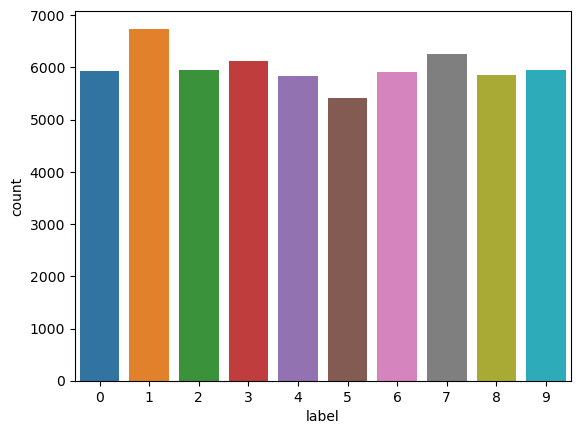

In [8]:
sns.countplot(data["label"])

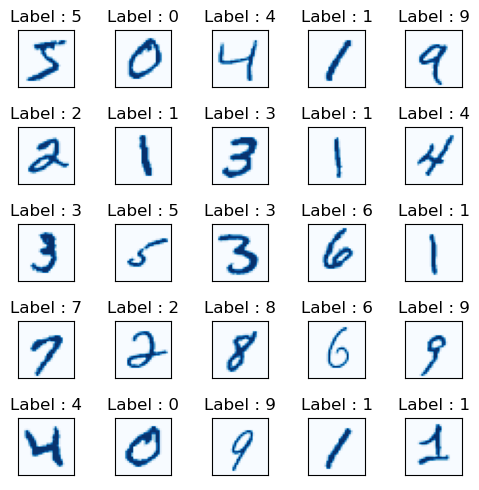

In [9]:
images = data["image"][0:100]
labels = data["label"][0:100]

images = np.vstack(images)
images = images.reshape(100,28,28)


fig, axes = plt.subplots(5,5, figsize = (5,5))

for i,ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap = 'Blues')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Label : {labels[i]}")

plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data["image"],data["label"],test_size = 0.3, random_state = 100)

In [11]:
X_train

30246    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
29403    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
25087    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
41812    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
41954    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                               ...                        
12119    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
57191    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
14147    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
56088    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
38408    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: image, Length: 42000, dtype: object

In [12]:
X_train_2d = np.vstack(X_train)
X_test_2d = np.vstack(X_test)

In [13]:
X_train_2d

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Standardization

In [14]:
# Standardization technique for increasing accuracy
# standardize X_train
mean = np.mean(X_train_2d, axis = 0)
std = np.std(X_train_2d, axis = 0)
std[std == 0] = 1
X_train_standardized = (X_train_2d - mean)/std

## One-vs-All Technique

If there are K different classes in a data-set, we will first build a model where we consider the data belonging to one class as positive, and all other classes as negative. Next, we will build another model assuming the data belonging to some other class as positive and the remaining as negative. We shall keep repeating the process until we build K different models.

Let us understand this better with the help of an example. In the below figure, we have data belonging to 3 different classes. Hence we will build 3 different models considering one particular class of data as positive and the remaining as negative.

In general, if there are K classes in the data-set, we need to build K different models.

In [14]:
from IPython.display import Image

Image(url = "1_U4A7gakHXGqaWwbGxP-Dlw.webp")

The data-set consists of digits from 0 to 9, so we have 10 different classes here. We will make use of the one-vs-all classification technique by training 10 different logistic regression classifiers as mentioned above.

## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

# Initialize a linear regression model
linear_reg_model = LinearRegression()

# Train a separate model for each class using the OvA strategy
models = {}
for i in range(10):
    Y_train_binary = (Y_train == i).astype(int)  # Convert to binary labels
    model = linear_reg_model.fit(X_train_standardized, Y_train_binary)
    models[i] = model

In [16]:
# Make predictions
Y_pred = []
for sample in X_test:
    max_score = float('-inf')
    predicted_class = None
    for i in range(10):
        score = models[i].predict([sample])
        #print(score)
        if score > max_score:
            max_score = score
            predicted_class = i
    Y_pred.append(predicted_class)

# Evaluate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.09927777777777778


## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 10000)

In [18]:
log_model.fit(X_train_standardized,Y_train)

LogisticRegression(max_iter=10000)

In [19]:
y_pred = log_model.predict(X_test_2d)

In [20]:
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

0.8302222222222222


In [21]:
# Standardization technique for increasing accuracy
# standardize X_train
mean = np.mean(X_test_2d, axis = 0)
std = np.std(X_test_2d, axis = 0)
std[std == 0] = 1
X_test_standardized = (X_test_2d - mean)/std

In [22]:
y_pred = log_model.predict(X_test_standardized)

In [23]:
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

0.9105555555555556


## SVM

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
scaler.fit(X_train_2d)

StandardScaler()

In [26]:
X_train_scaled = scaler.transform(X_train_2d)
X_test_scaled = scaler.fit_transform(np.vstack(X_test))

In [27]:
from sklearn.svm import SVC
rbf_model = SVC(kernel="rbf") 

In [28]:
rbf_model.fit(X_train_scaled,Y_train)

SVC()

In [29]:
y_pred = rbf_model.predict(X_test_scaled)

In [30]:
acc_rbf= accuracy_score(Y_test, y_pred)
print("accuracy:","{:.2f}".format(acc_rbf*100),"%")

accuracy: 96.03 %


## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators = 1000, )

In [32]:
rfc_model.fit(X_train_2d,Y_train)

RandomForestClassifier(n_estimators=1000)

In [33]:
y_pred = rfc_model.predict(X_test_2d)

In [34]:
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

0.9689444444444445


## KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 10)

In [17]:
knn_model.fit(X_train_2d,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [18]:
y_pred = knn_model.predict(X_test_2d)

C:\Users\sanja\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [19]:
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

0.9655555555555555


In [20]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1787
           1       0.94      0.99      0.97      2052
           2       0.98      0.95      0.97      1747
           3       0.96      0.97      0.96      1859
           4       0.98      0.96      0.97      1761
           5       0.96      0.96      0.96      1585
           6       0.98      0.98      0.98      1800
           7       0.96      0.97      0.96      1856
           8       0.99      0.91      0.95      1810
           9       0.94      0.96      0.95      1743

    accuracy                           0.97     18000
   macro avg       0.97      0.97      0.97     18000
weighted avg       0.97      0.97      0.97     18000



In [24]:
cm = confusion_matrix(Y_test,y_pred)

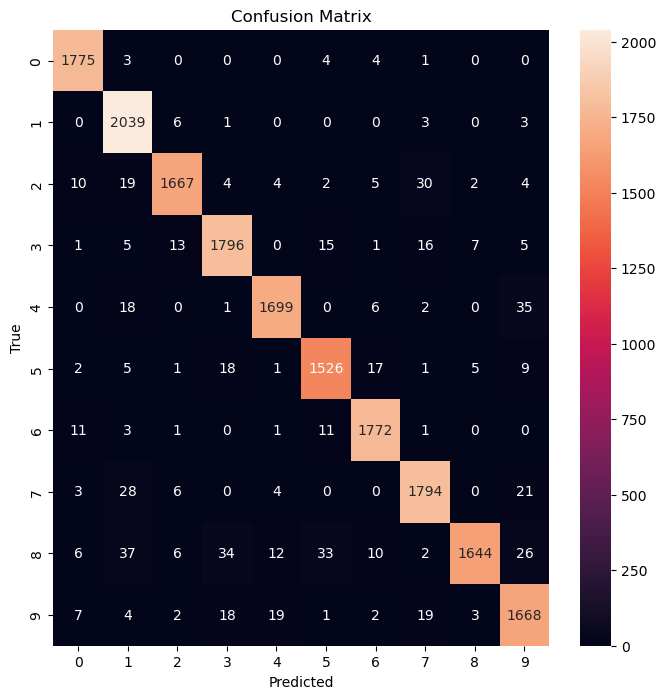

In [30]:
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, fmt = "g")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [34]:
dict = {"model":["Linear","Logistic","SVM","RFC","KNN"],"accuracy":[12.08, 91.05, 96.03, 96.38, 96.55]}

In [35]:
df = pd.DataFrame(dict)

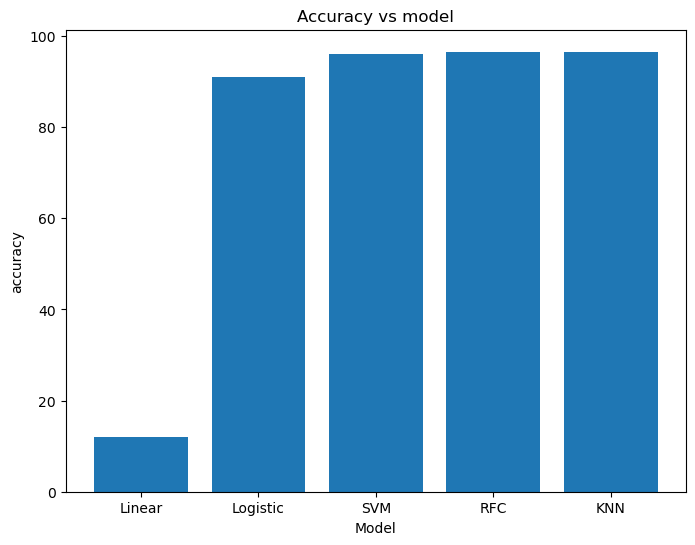

In [36]:
fig = plt.figure(figsize = (8,6))
plt.title("Accuracy vs model")
plt.xlabel("Model")
plt.ylabel("accuracy")
plt.bar(df["model"],df["accuracy"])
plt.show()